In [56]:
import textwrap
from datetime import datetime
from pathlib import Path

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from utilis.style import GW_COLORS
from utilis.local_utilis import ydynam

In [57]:
DATA_FILE = "data/monthly_significant_rules_by_admin.csv"
OUTPUT_DIR = "output"

In [62]:
data = pd.read_csv(DATA_FILE)

In [63]:
df = data.copy()

In [65]:
presidential_admin = "Biden"

In [64]:
df["Year"] = df["Year"].astype(str)
df["Date"] = pd.to_datetime(
        "01-" + df["Month"] + "-" + df["Year"],
        format="%d-%b-%Y",)

In [66]:
cols = list(df.columns)
month_idx = cols.index('Month')
cols.insert(month_idx + 1, cols.pop(cols.index('Date')))
df = df[cols]


In [67]:
value_cols = ["Economically Significant", "Other Significant"]
id_cols = [c for c in df.columns if c not in value_cols]

df = df.melt(
    id_vars=id_cols,
    value_vars = value_cols,
    var_name = 'Rule.Type',
    value_name='Rule.Number'
)

In [68]:
rule_type_order = ['Other Significant','Economically Significant']
df['Rule.Type'] = pd.Categorical(
    df['Rule.Type'],
    categories = rule_type_order,
    ordered = True
)

In [69]:
monthly_sig = df[df['Admin']==presidential_admin].copy()

In [11]:
current_date = datetime.now().strftime("%B %d,%Y")
caption_text = f"Source: Office of the Federal Register (federalregister.gov)\n\nUpdated {current_date}"
wrapped_caption = "\n".join(textwrap.wrap(caption_text, width=65))


In [12]:
monthly_totals = monthly_sig.groupby('Date')['Rule.Number'].sum().reset_index()
y_limit = ydynam(monthly_totals,10,'Rule.Number')

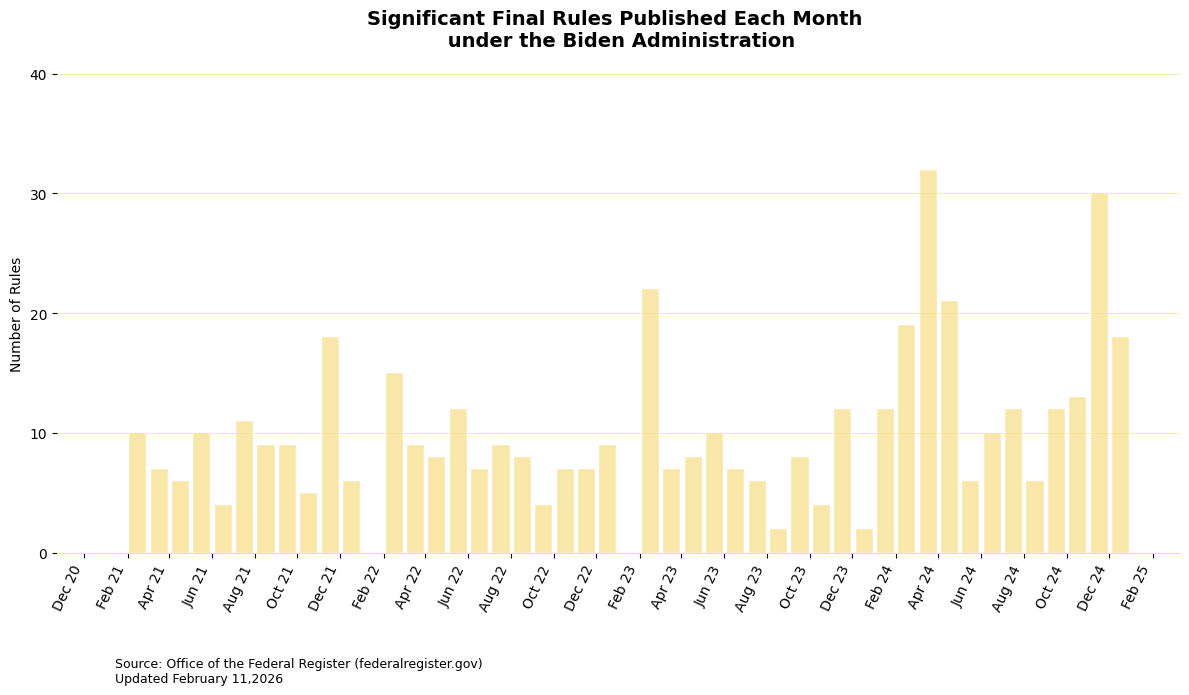

In [14]:
fig, ax = plt.subplots(figsize=(12, 9))

monthly_totals = monthly_sig.groupby("Date")["Rule.Number"].sum().reset_index()
y_limit = ydynam(monthly_totals, 10, "Rule.Number")

sns.histplot(
    data = monthly_sig,
    x = 'Date',
    weights = 'Rule.Number',
    hue = 'Rule.Type',
    multiple='stack',
    palette = {"Economically Significant":GW_COLORS['lightyellow'], "Other Significant":GW_COLORS['lightyellow']},
    shrink = 0.8,
    edgecolor = "white",
    linewidth = 0.3,
    bins=48,
    ax = ax
)

ax.set_ylim(0, y_limit)
ax.set_yticks(range(0, int(y_limit)+1,10))

ax.set_title(f"Significant Final Rules Published Each Month \n under the {presidential_admin} Administration", pad=20, fontsize=14, fontweight='bold', ha='center')
ax.set_ylabel("Number of Rules")
ax.set_xlabel("")

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.xticks(rotation = 65, ha='right')

ax.spines[['top','right','left']].set_visible(False)
ax.spines['bottom'].set_color(GW_COLORS['lightyellow'])
ax.grid(axis = 'y', color = GW_COLORS['lightyellow'], linestyle='-',linewidth=0.5)
ax.set_axisbelow(True)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], ["Other Significant", "Economically Significant"],
          loc='lower center', bbox_to_anchor=(0.5, -0.25),
          ncol=2, frameon=False, fontsize=12)

# Caption
plt.figtext(0.1, 0.02, wrapped_caption, wrap=True, horizontalalignment='left', fontsize=9)

plt.tight_layout()
plt.show()



In [38]:
monthly_sig

,Admin,Year,Month,Date,Months in Office,Significant,Economically Significant,Rule.Type,Rule.Number
486,Biden,2021,Jan,2021-01-01,0,0.0,0.0,Other Significant,0.0
487,Biden,2021,Feb,2021-02-01,1,9.0,6.0,Other Significant,3.0
488,Biden,2021,Mar,2021-03-01,2,11.0,4.0,Other Significant,7.0
489,Biden,2021,Apr,2021-04-01,3,9.0,2.0,Other Significant,7.0
490,Biden,2021,May,2021-05-01,4,16.0,10.0,Other Significant,6.0
491,Biden,2021,Jun,2021-06-01,5,12.0,2.0,Other Significant,10.0
492,Biden,2021,Jul,2021-07-01,6,12.0,8.0,Other Significant,4.0
493,Biden,2021,Aug,2021-08-01,7,21.0,10.0,Other Significant,11.0
494,Biden,2021,Sep,2021-09-01,8,12.0,3.0,Other Significant,9.0
495,Biden,2021,Oct,2021-10-01,9,15.0,6.0,Other Significant,9.0
